Name: Perez, Cris John M.<br>
Course and Section: CPE 019 - CPE32S9<br>
Date of Submission: February 7, 2024<br>
Instructor: Engr. Roman Rirchard<br>

### Correlation Analaysis in Python

Objectives:<br>
Part 1: The Dataset<br>
Part 2: Scatterplot Graphs and Correlatable Variables<br>
Part 3: Calculating Correlation with Python<br>
Part 4: Visualizing<br>

Scenarion/Background:
Correlation is an important statistical relationship that can indicate whether the variable values are linearly related.<br>
In this lab, you will learn how to use Python to calculate correlation. In Part 1, you will setup the dataset. In Part 2, you will learn how to identify if the varibales in a given dataset are correlatable. Finally, in Part 3, you will use Python to clalculate the correlation between two sets of variable.


#### Required Resources
1 PC with Internet access<br>
Raspberry Pi version 2 or higher<br>
Python libraries: pandas, numpy, matplotlib, seaborn<br>
Datafiles: brainsize.txt

### **Part 1: The Dataset**

Step 1: Loading the Dataset From a File.<br>

Before the dataset can be used, it must be loaded onto memory.<br><br>
In the code below, The first line imports the pandas modules and defines pd as a descriptor that refers to
the module.<br><br>
The second line loads the dataset CSV file into a variable called brainFile.<br><br>
The third line uses read_csv(), a pandas method, to convert the CSV dataset stored in brainFile into a
dataframe. The dataframe is then stored in the brainFrame variable.<br><br>
Run the cell below to execute the described functions.


In [ ]:
# Code cell 1
import pandas as pd
brainFrame = pd.read_csv('/content/brainsize.txt', sep = '\t')

Step 2: Verifying the dataframe.<br><br>
To make sure the dataframe has been correctly loaded and created, use the head() method. Another Pandas method, head() displays the first five entries of a dataframe.

In [ ]:
# Code cell 2
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


In [ ]:
brainFrame.tail()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
35,Female,133,129,128,153.0,66.5,948066
36,Male,140,150,124,144.0,70.5,949395
37,Female,88,86,94,139.0,64.5,893983
38,Male,81,90,74,148.0,74.0,930016
39,Male,89,91,89,179.0,75.5,935863


### **Part 2: Scatterplot Graphs and Correlatable Variables**

Step 1: The pandas describe() method. <br><br>

The pandas module includes the describe() method which performs same common calculations
against a given dataset. In addition to provide common results including count, mean, standard
deviation, minimum, and maximum, describe() is also a great way to quickly test the validity of the
values in the dataframe. <br><br>
Run the cell below to output the results computed by describe() against the brainFrame dataframe.

In [ ]:
# Code cell 3
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


Step 2: Scatterplot Graphs<br><br>

Scatterplot graphs are important when working with correlations as they allow for a quick visual
verification of the nature of the relationship between the variables. This lab uses the Pearson correlation
coefficient, which is sensitive only to a linear relationship between two variables. Other more robust
correlation methods exist but are out of the scope of this lab. <br><br>

a. Load the required modules<br><br>

Before graphs can be plotted, it is necessary to import a few modules, namely numpy and matplotlib.
Run the cell below to load these modules.

In [ ]:
# Code cell 4
import numpy as np
import matplotlib.pyplot as plt

b. Separate the data.<br><br>

To ensure the results do not get skewed because of the differences in male and female bodies, the
dateframe is split into two dataframes: one containing all male entries and another with only female
instances.<br><br>

Running the cell below creates the two new dataframes, menDf and womenDf, each one containing the
respective entries.

In [ ]:
# Code cell 5
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]

c. Plot the graphs.<br><br>
Because the dataset includes three different measures of intelligence (PIQ, FSIQ, and VIQ), the first line
below uses Pandas mean() method to calculate the mean value between the three and store the result in
the menMeanSmarts variable. Notice that the first line also refers to the menDf, the filtered dataframe
containing only male entries.<br><br>
The second line uses the matplotlib method scatter() to create a scatterplot graph between the
menMeanSmarts variable and the MRI_Countattribute. The MRI_Count in this dataset can be thought as of
a measure of the physical size of the subjects' brains.<br><br>
The third line simply displays the graph.<br><br>
The fourth line is used to ensure the graph will be displayed in this notebook.


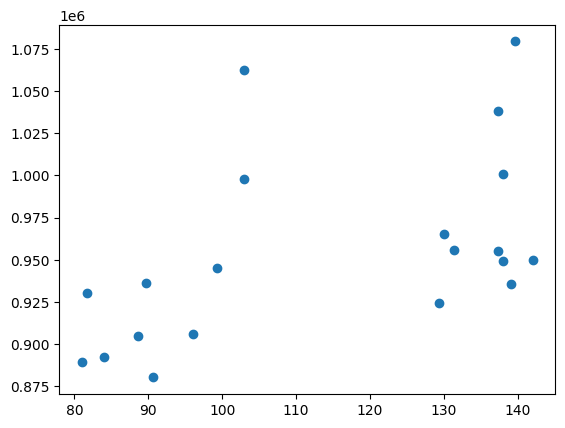

In [ ]:
# Code cell 6
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

Similarly, the code below creates a scatterplot graph for the women-only filtered dataframe.

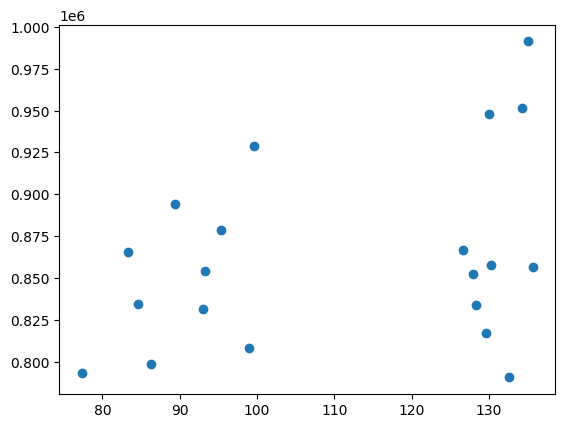

In [ ]:
# Code cell 7
# Graph the women-only filtered dataframe
#womenMeanSmarts = ?
#plt.scatter(?, ?)
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])
plt.show()
%matplotlib inline

### **Part 3: Calculating Correlation with Python**

Step 1: Calculate correlation against brainFrame.<br><br>
The pandas corr() method provides an easy way to calculate correlation against a dataframe. By simply
calling the method against a dataframe, one can get the correlation between all variables at the same
time.

In [ ]:
 # Code cell 8
brainFrame.corr(method='pearson')

<ipython-input-15-cab48f3abe05>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  brainFrame.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


Notice at the left-to-right diagonal in the correlation table generated above. Why is the diagonal filled
with 1s? Is that a coincidence? Explain.<br><br>
Still looking at the correlation table above, notice that the values are mirrored; values below the 1
diagonal have a mirrored counterpart above the 1 diagonal. Is that a coincidence? Explain.<br><br>
Using the same corr() method, it is easy to calculate the correlation of the variables contained in the
female-only dataframe:

In [ ]:
# Code cell 9
womenDf.corr(method='pearson')

<ipython-input-16-a6271751808a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  womenDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


And the same can be done for the male-only dataframe:

In [ ]:
 # Code cell 10
# Use corr() for the male-only dataframe with the pearson method
#?.corr(?)
menDf.corr(method='pearson')

<ipython-input-17-71c6c33fd81a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  menDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


### **Part 4: Visualizing**

Step 1: Install Seaborn.<br><br>
To make it easier to visualize the data correlations, heatmap graphs can be used. Based on colored
squares, heatmap graphs can help identify correlations in a glance.<br><br>
The Python module named seaborn makes it very easy to plot heatmap graphs.<br><br>
First, run the cell below to download and install the seaborn module.

In [ ]:
 # Code cell 11
!pip install seaborn

Step 2: Plot the correlation heatmap.<br><br>
Now that the dataframes are ready, the heatmaps can be plotted. Below is a breakdown of the code in the
cell below:<br><br>
Line 1: Generates a correlation table based on the womenNoGenderDf dataframe and stores it on wcorr.<br>
Line 2: Uses the seaborn heatmap() method to generate and plot the heatmap. Notice that heatmap()
takes wcorr as a parameter.<br>
Line 3: Use to export and save the generated heatmap as a PNG image. While the line 3 is not active (it
has the comment # character preceding it, forcing the interpreter to ignore it), it was kept for
informational purposes.

<ipython-input-19-2465c40f5efb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wcorr = womenDf.corr()


<Axes: >

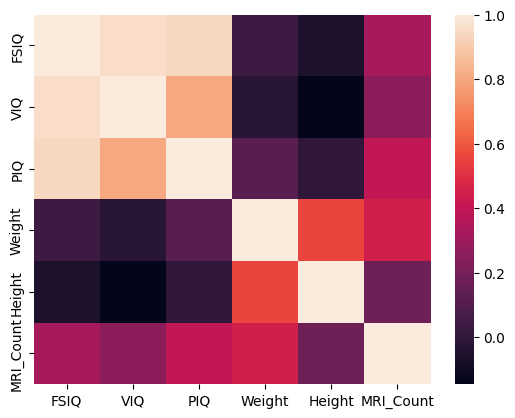

In [ ]:
 # Code cell 12
import seaborn as sns
wcorr = womenDf.corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Similarly, the code below creates and plots a heatmap for the male-only dataframe.

<ipython-input-20-ff3e250059fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mcorr = menDf.corr()


<Axes: >

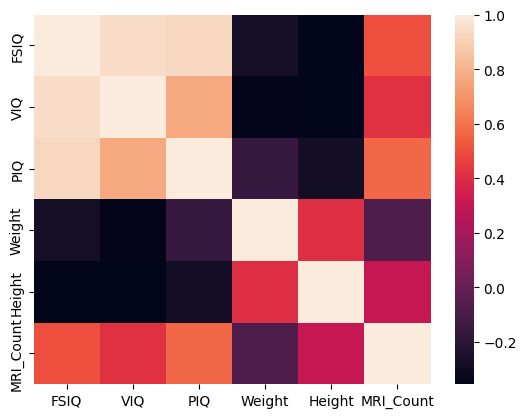

In [ ]:
# Code cell 14
mcorr = menDf.corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

**Many variable pairs present correlation close to zero. What does that mean?**<br><br>

Having a correlation close to zero means that the relationship between these pairs of variables is very weak to none at all because in correlational analysis, correlation should be distant from zero to have a stronger relationship between the variables.

**Why separate the genders?**<br><br>

We seperate the genders so that we could also compare the correlation between men and women.

**What variables have stronger correlation with brain size (MRI_Count)? Is that expected? Explain.**<br><br>

From the women's data, the weight has the strongest correlation with the brain size. However, from the men's data, the PIQ along with the other measurements of IQ were the strongest in terms of their correlation to the brain size.

### **Supplementary Activity**

Background/Scenario<br><br>

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

Importing the data

In [ ]:
import pandas as pd
obesityLevels = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')

Verifying the data

In [ ]:
obesityLevels.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
obesityLevels.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
obesityLevels.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


I didn't include a graph as I see it as unnecessary since we don't have multiple measurements for a single category like the IQs from the procedures.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

menoL = obesityLevels[(obesityLevels.Gender == 'Male')]
womenoL = obesityLevels[(obesityLevels.Gender == 'Female')]

In [ ]:
obesityLevels.corr(method='pearson')

<ipython-input-35-9494e6167544>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  obesityLevels.corr(method='pearson')


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


In [ ]:
menoL.corr(method='pearson')

<ipython-input-36-0c92c50edcaa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  menoL.corr(method='pearson')


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,0.040664,0.420845,0.058852,-0.075952,-0.108256,-0.062429,-0.236109
Height,0.040664,1.000000,0.376737,0.097251,0.235927,0.114341,0.156536,-0.041511
Weight,0.420845,0.376737,1.000000,0.051279,-0.079688,-0.009121,-0.137819,-0.126618
FCVC,0.058852,0.097251,0.051279,1.000000,-0.035841,-0.075996,0.180114,-0.047921
NCP,-0.075952,0.235927,-0.079688,-0.035841,1.000000,0.038170,0.135331,0.054318
CH2O,-0.108256,0.114341,-0.009121,-0.075996,0.038170,1.000000,0.180545,0.073380
FAF,-0.062429,0.156536,-0.137819,0.180114,0.135331,0.180545,1.000000,0.014895
TUE,-0.236109,-0.041511,-0.126618,-0.047921,0.054318,0.073380,0.014895,1.000000


In [ ]:
womenoL.corr(method='pearson')

<ipython-input-37-90ab379f946c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  womenoL.corr(method='pearson')


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.179837,0.040272,0.006390,-0.021654,0.002100,-0.250961,-0.369597
Height,-0.179837,1.000000,0.542288,0.241191,0.277048,0.254874,0.301981,0.157585
Weight,0.040272,0.542288,1.000000,0.419869,0.217110,0.322086,-0.047820,-0.036257
FCVC,0.006390,0.241191,0.419869,1.000000,0.143056,0.249558,-0.015003,-0.154375
NCP,-0.021654,0.277048,0.217110,0.143056,1.000000,0.060436,0.104579,0.015906
CH2O,0.002100,0.254874,0.322086,0.249558,0.060436,1.000000,0.122381,-0.056829
FAF,-0.250961,0.301981,-0.047820,-0.015003,0.104579,0.122381,1.000000,0.103678
TUE,-0.369597,0.157585,-0.036257,-0.154375,0.015906,-0.056829,0.103678,1.000000


I used pearson to test the significance of the variables and their relationship to each of the other variables

<ipython-input-40-9aee32788a39>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wcorroL = womenoL.corr()


<Axes: >

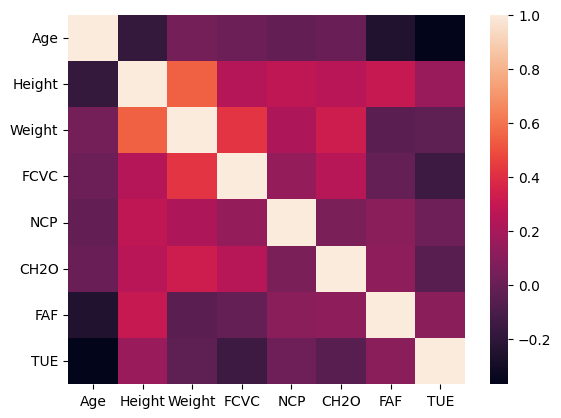

In [ ]:
import seaborn as sns
wcorroL = womenoL.corr()
sns.heatmap(wcorroL)

<ipython-input-39-43bccd6cceb6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mcorroL = menoL.corr()


<Axes: >

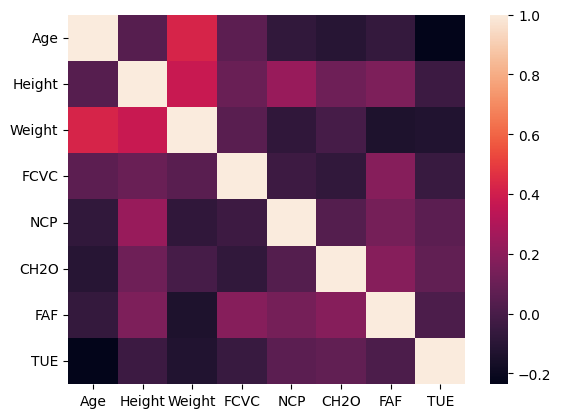

In [ ]:
import seaborn as sns
mcorroL = menoL.corr()
sns.heatmap(mcorroL)

I have observed from the heatmap that from the women's data, the vegetables intake (FCVC) has the strongest relationship to the weight. On the men's data, FCVC also has the strongest relationship to the weight but is relatively weaker than the women's.

### **Conclusions/Lessons Learned**<br><br>

In this activity, we were introduced on how correlation analysis works in python. We were tasked to use the dataset with 40 samples correlating their traits and IQ to the size of their brain. We were given codes to load the dataset, verify the dataframe, scatterplot graphs, load required modules, separate data, plot the graphs, calculate correlation, and then plot the correlation heatmap. I have learned from this activity how to navigate the dataset and the basics of correlational analysis using python.

### **Dataset used**

Estimation of obesity levels based on eating habits and physical condition . (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.